# Term Deposit Prediction

## Introduction

**Project Background:**
In today's competitive banking industry, accurately predicting whether a customer will subscribe to a term deposit is crucial for optimizing marketing strategies and protecting critical business interests. The data for this project is orginally derived from direct marketing campaigns of a Portuguese banking institution by [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing). These campaigns were conducted via phone calls, often requiring multiple contacts with the same client to determine whether they would subscribe to the term deposit ('yes') or not ('no'). The dataset comprises 45,211 instances, reflecting the substantial effort involved in these marketing activities.

**Problem Statement:**
+ A significant number of false positives, where non-subscribers are incorrectly predicted as subscribers, can lead to substantial business losses by allocating resources inefficiently and damaging customer relationships.

+ In this project, the number of false positives far exceeds the number of false negatives, with low precision and recall rates when predicting non-subscribers.

+ The primary objective is to develop predictive models that effectively minimize false positives, particularly within the context of this imbalanced dataset.

**Machine Learning Models:**
+ Three machine learning models were evaluated: Logistic Regression, Support Vector Machine (SVM), and Random Forest.
  
+ After thorough analysis and comparison based on the aim of this project, the SVM model outperformed the other two in key performance metrics.

**Insights:**
+ The low precision and recall rates for predicting non-subscribers highlight the difficulty in distinguishing between subscribers and non-subscribers.

+ This imbalance can lead to models that are biased towards predicting the majority class, increasing the risk of false positives.

+ False positives are particularly costly in this context, as predicting a non-subscriber as a subscriber can lead to wasted marketing efforts, misallocation of resources, and potentially strained customer relationships.


### Import Libraries and Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\concordia-bootcamps\\M6 Project\\bank marketing prediction\\bank-full.csv', sep=';')

### Exploratory Data Analysis (EDA)

#### 1. Inspect dataset

In [7]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14749,43,technician,single,secondary,no,326,yes,no,cellular,15,jul,87,8,-1,0,unknown,no
3650,28,blue-collar,single,primary,no,643,yes,no,unknown,15,may,297,1,-1,0,unknown,no
20611,59,retired,married,secondary,no,566,no,no,cellular,12,aug,464,4,-1,0,unknown,no
22919,51,management,married,tertiary,no,9864,no,no,cellular,26,aug,69,4,-1,0,unknown,no
22916,42,management,married,tertiary,no,0,no,no,cellular,26,aug,179,16,-1,0,unknown,no


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
# Check each col datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
# Check the sum of null values in each col
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
# Check categorical cols value counts
categorical_columns = ['job', 'marital', 
                       'education', 'housing',
                       'default', 'loan',
                       'contact', 'pdays',
                       'poutcome', 'month', 
                       'day', 'y']

for col in categorical_columns:
    print('\n')
    print(df[col].value_counts())



job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


housing
yes    25130
no     20081
Name: count, dtype: int64


default
no     44396
yes      815
Name: count, dtype: int64


loan
no     37967
yes     7244
Name: count, dtype: int64


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64


poutcome
unknown    3

In [17]:
# Rename the target col
df.rename(columns={'y': 'term deposit'}, inplace=True)

#### 2. Checking Inconsistent Data
As data source mentioned, when 'passed days' = -1, which means client was not previously contacted, then we should have 0 value in 'previous', and 'unknown' outcome in 'poutcome'.

In [20]:
filtered_df = df[df['pdays'] == -1][['pdays', 'previous', 'poutcome']]
print(filtered_df.value_counts())

pdays  previous  poutcome
-1     0         unknown     36954
Name: count, dtype: int64


#### 3. Data Visualization

In [23]:
# Create a copy of df
bank = df.copy()

#### 3.1 Distribution of the Target Variable (Term Deposit)

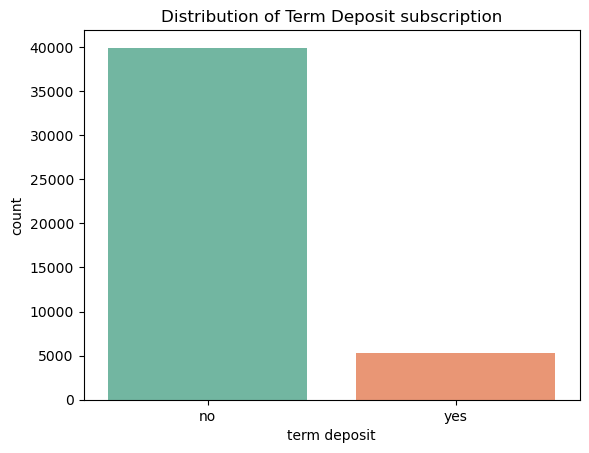

In [26]:
sns.countplot(data=bank, 
              x='term deposit', 
              hue='term deposit', 
              palette='Set2')

plt.title('Distribution of Term Deposit subscription')
plt.show()

**Summary:** Given that the dataset is highly imbalanced, with subscribed customers making up only 11%, this imbalance is likely to result in poor model performance on the minority class. Additionally, the accuracy score may be misleadingly high, as the model could perform well simply by predicting that customers are unsubscribed.

#### 3.2 Distribution of Age

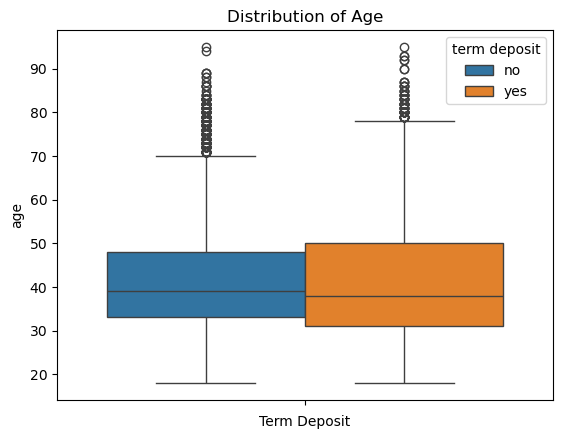

In [30]:
sns.boxplot(data=bank, 
            y='age', 
            hue='term deposit')

plt.title('Distribution of Age')
plt.xlabel('Term Deposit')
plt.show()

In [32]:
print('Age standard deviation:', bank['age'].std())
print('Min Age:', bank['age'].min())
print('Max Age:', bank['age'].max())

Age standard deviation: 10.618762040975431
Min Age: 18
Max Age: 95


**Summary:**
The median age of customers who subscribed to a term deposit is slightly higher than those who did not. with a minimum age of 18 and maximum age of 95 , both groups have a number of outliers, which are ages that lie significantly outside the normal range(18, 70).

#### 3.3 Distribution of Job by Term Deposit

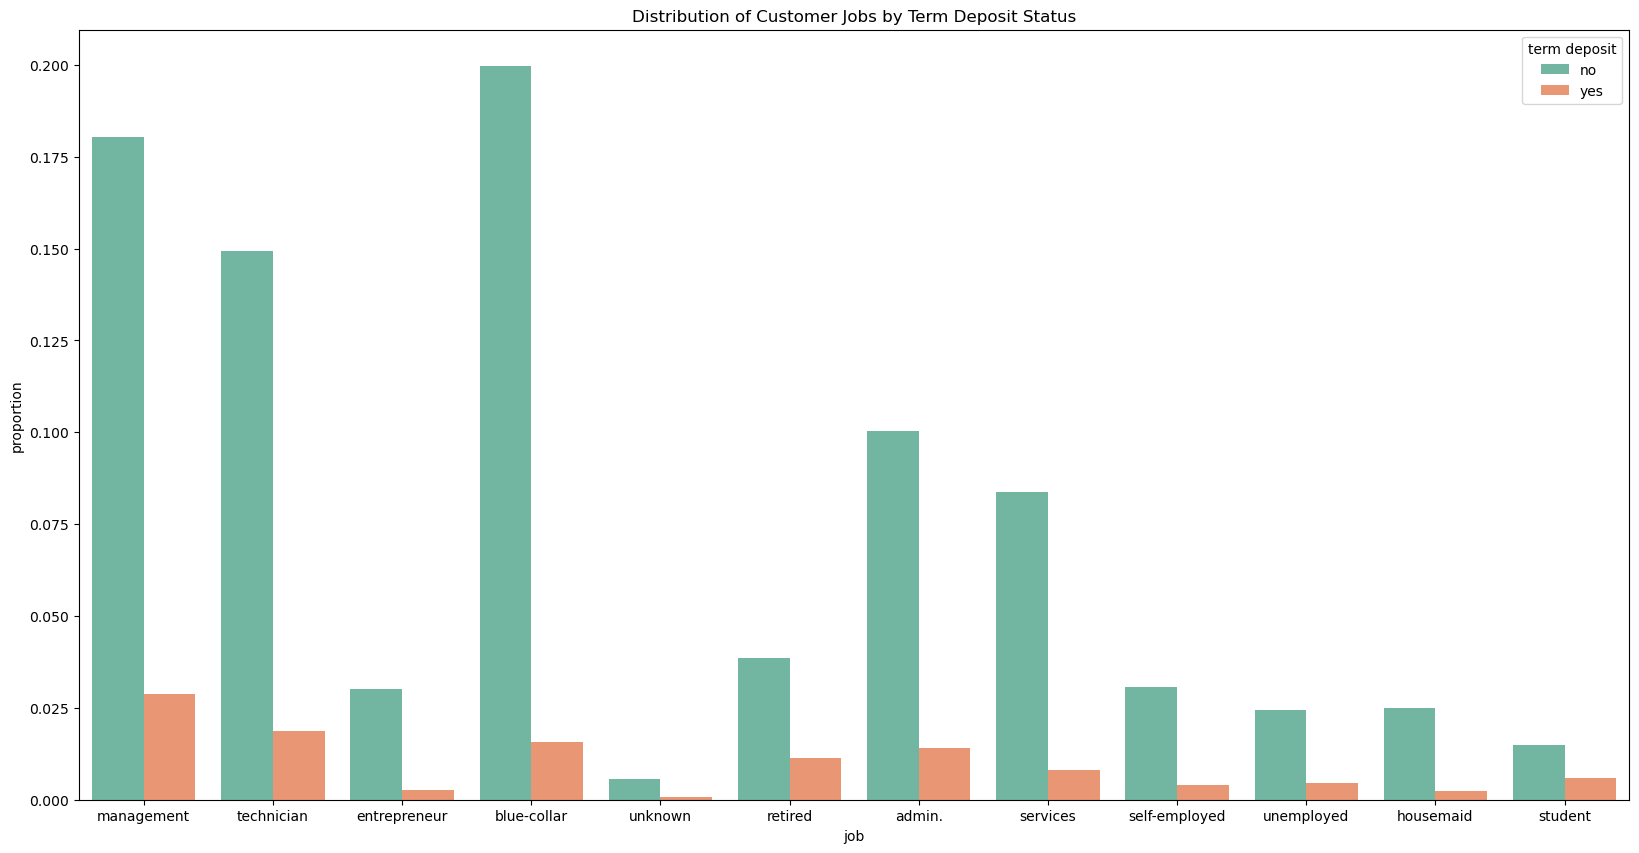

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(data=bank, 
              x='job', 
              hue='term deposit', 
              stat='proportion', 
              palette='Set2')

plt.title('Distribution of Customer Jobs by Term Deposit Status')
plt.show()

In [37]:
# Check the mean balance for each job category
mean_balance_job = bank.groupby('job')['balance'].mean()
ordered_mean_balance = mean_balance_job.sort_values(ascending=False)
print('Mean Balance in each job: \n\n', ordered_mean_balance)

Mean Balance in each job: 

 job
retired          1984.215106
unknown          1772.357639
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
housemaid        1392.395161
student          1388.060768
technician       1252.632092
admin.           1135.838909
blue-collar      1078.826654
services          997.088108
Name: balance, dtype: float64


**Summary:** With the mean stats in each job category, there is a noticeable differences in average balances, with some groups having much higher average balances than others. The highest mean balances group are 'retired' individuals (1984.22), 'unknown'(1772.36), and 'management'(1763.62). 

In [41]:
# Check the std balance for each job category
std_balance_job = bank.groupby('job')['balance'].std()
ordered_std_balance = std_balance_job.sort_values(ascending=False)
print('Standard Deviation in each job: \n\n', ordered_std_balance)

Standard Deviation in each job: 

 job
retired          4397.044177
entrepreneur     4153.442626
management       3822.965605
self-employed    3684.259573
unemployed       3144.666754
housemaid        2984.692098
unknown          2970.288559
admin.           2641.962686
technician       2548.544019
student          2441.703526
blue-collar      2240.523208
services         2164.493505
Name: balance, dtype: float64


**Summary:**  The standard deviation values illustrate the extent of variability in financial outcomes across different job categories, with some categories exhibiting more diversity in outcomes than others. The top three highest group are 'retired', 'entrepreneur', and 'management' which suggest that there is a significant diversity in balances among people in these categories.

#### 3.4 Distribution of Balance

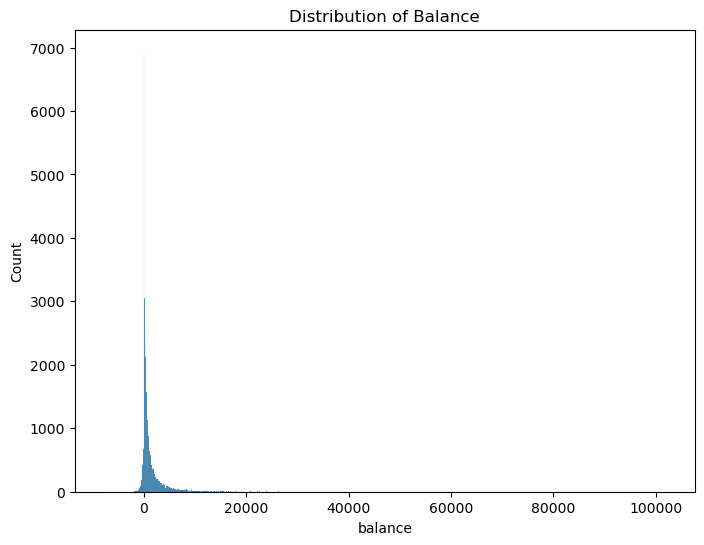

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(data=bank, 
             x='balance')

plt.title('Distribution of Balance')
plt.show()

**Summary:** The distribution is highly skewed to the right, with the majority of values concentrated around lower balances (close to zero). With a long right tail, it suggests the presence of outliers in 'balance', where the balance is significantly higher than the majority of the data, causing the distribution to be heavily skewed.

#### 3.5 Distribution of Marital status by Term Deposit

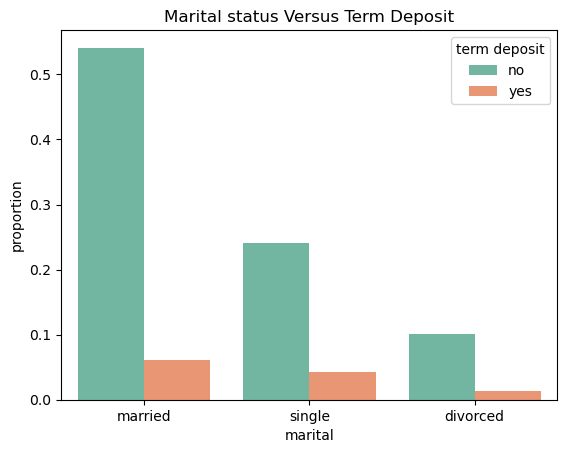

In [49]:
sns.countplot(data=bank, 
              x='marital', 
              hue='term deposit', 
              stat='proportion', 
              orient='v', 
              palette='Set2')

plt.title('Marital status Versus Term Deposit')
plt.show()

**Summary:** The bar plot displays the relationship between marital status and the likelihood of subscribing to a term deposit. The majority are married individuals, however, only a small proportion subscirbes to term deposit. Single and Divorced individuals are similar to married, most did not subscribe, small proportion did.

#### 3.6 Distribution of Education levels by Term Deposit

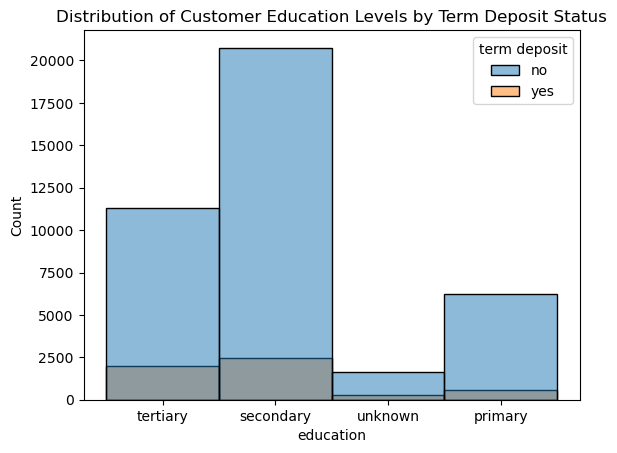

In [53]:
sns.histplot(data=bank, 
             x='education', 
             hue='term deposit', 
             multiple='layer', 
            )

plt.title('Distribution of Customer Education Levels by Term Deposit Status')
plt.show()

**Summary:** This bar plot shows the distribution of customer education levels categorized by whether they subscribed to a term deposit or not. The grey shades represent subscirbed customers in each education level. Customers with tertiary education seem more likely to subscribe than those with primary education, although secondary education has the highest number of customers overall.

#### 3.7 Correlation Matrix of Numerical Variables

In [57]:
# Convert target y to binary 
bank['term deposit'] = np.where(bank['term deposit'] == 'yes', 1, 0)

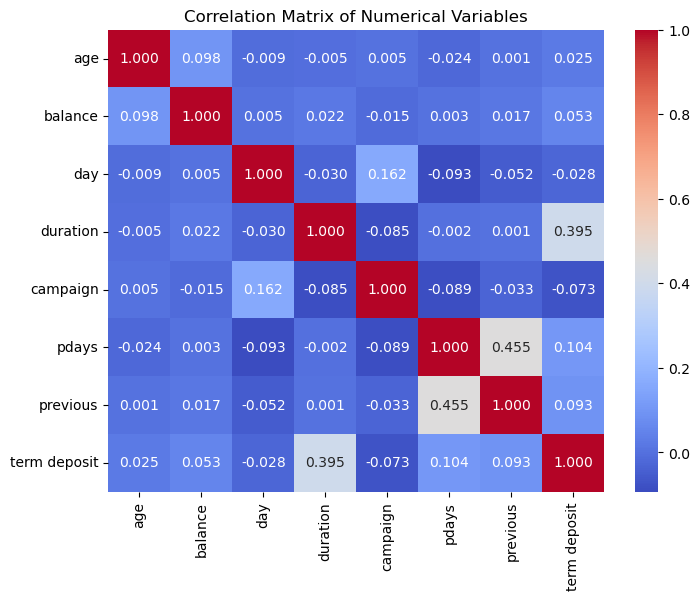

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(data=bank.corr(numeric_only=True), 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm')

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [61]:
# Get the top 4 strong correaltion with target
corr_matrix=bank.corr(numeric_only=True).abs()
top_4_corr=corr_matrix['term deposit'].nlargest(5)
print('Top 4 strongest Correaltion with Target: \n\n', top_4_corr)

Top 4 strongest Correaltion with Target: 

 term deposit    1.000000
duration        0.394521
pdays           0.103621
previous        0.093236
campaign        0.073172
Name: term deposit, dtype: float64


**Summary:** The duration of last contact has a moderative positive correlation with the term deposit, suggesting that longer durations may lead a higher chance of subscribing term deposit. 

#### 3.8 Distribution of Duration

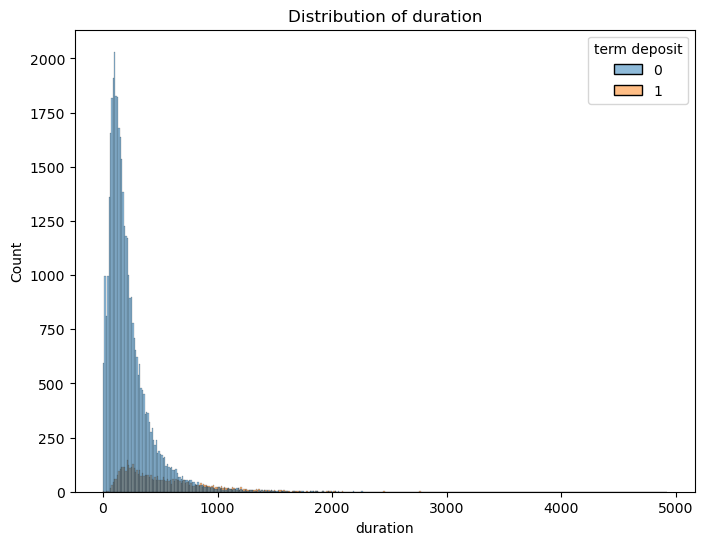

In [65]:
plt.figure(figsize=(8, 6))
sns.histplot(data=bank, 
             x='duration', 
             hue='term deposit')

plt.title('Distribution of duration')
plt.show()

**Summary:** The distribution of the duration variable is highly skewed to the right. Most of the values are concentrated on the left side of the plot (low duration), with very few observations having high duration. For both categories, the distribution is similar in shape. However, customer who subscribed term deposit is generally spending more time on the call compared to who didn't subscribe. 

### Model Training and Evaluation 

#### 1. Prepare Data 

In [70]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'term deposit'],
      dtype='object')

In [72]:
# Drop redudant cols
cols_to_drop = ['contact', 'day', 'month', 'duration']

bank = bank.drop(columns= cols_to_drop)

**Feature Selection:**

- 'contact': It's the communication method, not relevant to predict y
- 'day': Last contact day of the month, not relevant
- 'month': Same attribute as 'day' does, not relevant
- 'duration': From datasource, this attribute highly affects the output target, since the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, since the purpose is to have a realistic predictive model, have to discard it.

#### 2. Handle imbalanced dataset

In [76]:
# Imports
from sklearn.model_selection import train_test_split

# Filter unsub customers by term deposit = 0
unsubscribed_customers = bank[bank['term deposit'] == 0]

# Split the data with crucial feature 'marital'
X_train, X_test = train_test_split(unsubscribed_customers, 
                                   test_size=0.6, 
                                   stratify=unsubscribed_customers['job'], 
                                   random_state=42)


In [78]:
X_train.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
campaign        0
pdays           0
previous        0
poutcome        0
term deposit    0
dtype: int64

               Original   X_train
job                              
admin.         0.114375  0.113727
blue-collar    0.215257  0.226015
entrepreneur   0.032890  0.034131
housemaid      0.027427  0.028307
management     0.209197  0.204346
retired        0.050076  0.043775
self-employed  0.034925  0.034882
services       0.091880  0.094815
student        0.020747  0.016784
technician     0.168034  0.169276
unemployed     0.028820  0.027555
unknown        0.006370  0.006388


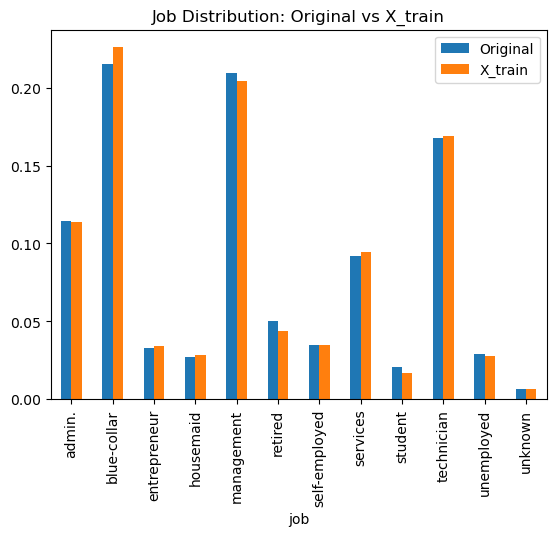

In [225]:
# Check if the distribution of the job feature in X_train matches the original DataFrame bank

# Calculate the distribution of 'job' in the original df
original_distribution = bank['job'].value_counts(normalize=True)

# Calculate the distribution of 'job' in X_train
train_distribution = X_train['job'].value_counts(normalize=True)

# Combine both distributions into a single df for comparison
comparison_df = pd.DataFrame({'Original': original_distribution,
                              'X_train': train_distribution}).sort_index()

# Display the comparison df
print(comparison_df)

# Visualize the distribution
comparison_df.plot(kind='bar', title='Job Distribution: Original vs X_train')
plt.show()

**Summary:** From comparison dataframe and distribution bar plot, the proportions in X_train are quite close to those in the original dataset, which suggests that train set is reasonably representative of the original data in terms of job distribution.

In [83]:
# Filter out sub customers by term deposit = 1
subscribed_customers = bank[bank['term deposit'] == 1]

# Combine two df 
new_bank = pd.concat([subscribed_customers, X_train], axis=0)

# Reset df index
new_bank = new_bank.reset_index(drop=True)

In [85]:
# Compared new and original distribution of dataset 
print('New DataFrame Distribution: \n\n', new_bank['term deposit'].value_counts())
print('\n')
print('Original DataFrame Distribution: \n\n', bank['term deposit'].value_counts())

New DataFrame Distribution: 

 term deposit
0    15968
1     5289
Name: count, dtype: int64


Original DataFrame Distribution: 

 term deposit
0    39922
1     5289
Name: count, dtype: int64


In [87]:
# Check the sum of null in new df
new_bank.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
campaign        0
pdays           0
previous        0
poutcome        0
term deposit    0
dtype: int64

**Summary:** Given the highly imbalanced dataset, ensuring the stratified distribution of a categorical feature like 'marital' is important for maintaining representativeness in both the training and testing sets. This approach helped adjust the distribution, with unsubscribed customers making up 25% of the dataset.

#### 3. OneHotEncoder on Categorical Columns

In [91]:
# Imports
from sklearn.preprocessing import OneHotEncoder

In [93]:
# Encode categorical columns
cols_to_enco = ['job', 'marital', 
                'education', 'default',
                'housing', 'loan', 
                'poutcome']

enco = OneHotEncoder(drop='if_binary',sparse_output=False)

# Fit and transform the data
enco_cols = enco.fit_transform(new_bank[cols_to_enco])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(enco_cols, columns=enco.get_feature_names_out(cols_to_enco))

# Combine the original DataFrame (excluding the columns that were encoded) with the new encoded DataFrame
bank_final = pd.concat([new_bank.drop(columns=cols_to_enco), encoded_df], axis=1)

In [95]:
# Check the name of columns 
bank_final.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'term deposit',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

#### 4. Reduce outliers by DBSCAN

In [98]:
# Imports
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [100]:
# Separate X and y features
X = bank_final.drop('term deposit', axis=1)
y = bank_final['term deposit']

# Train test Split 
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.1 Find the optimal Eps value

In [102]:
# Initialize an instance
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_outliers)
X_test_scaled = scaler.transform(X_test_outliers)

# Create a list to store outliers
outliers = []
percentage_outliers = []

# Loop for eps values
for eps in np.linspace(0.001,3,50):
    
    # Create and fit the model
    model = DBSCAN(eps=eps, min_samples=12)
    model.fit(X_train_scaled)
    
    # Get Cluster labels for each point
    labels = model.labels_

    # Count outliers
    num_outliers = np.sum(labels == -1)
    # Store in the list
    outliers.append(num_outliers)
    # Calculate outlier percentage
    outlier_percent = (num_outliers / len(labels))* 100
    # Store in the list
    percentage_outliers.append(outlier_percent)

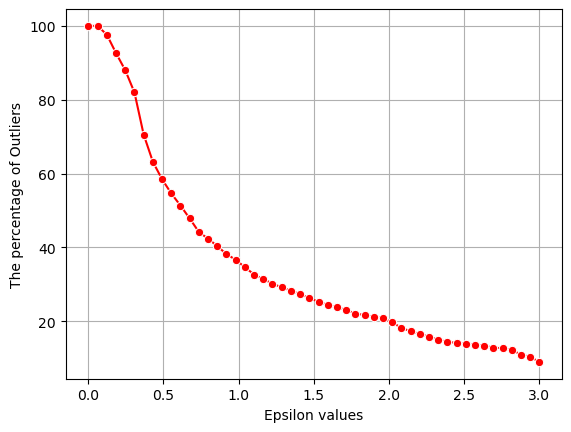

In [104]:
# Outlier points vs. eps value lineplot
sns.lineplot(x=np.linspace(0.001,3,50), y=percentage_outliers, marker='o', c='r')
plt.xlabel('Epsilon values')
plt.ylabel('The percentage of Outliers')
plt.grid(True)
plt.show()

#### 4.2 Create new df with only Training sets(No outliers)

In [109]:
db = DBSCAN(eps=2, min_samples=12)   # eps=2 optimal selection
db.fit(X_train_scaled)

no_outliers = labels != -1

# Filter out outliers (noise points labeled as -1)
X_train_clean = X_train_scaled[no_outliers]

y_train_clean = y_train_outliers[no_outliers]


# Create a new df
bank_train_clean = pd.DataFrame(X_train_clean, columns=X.columns)
bank_train_clean['term deposit'] = y_train_clean.values

#### 5. First Model - Logistic Regression 

**5.1 LogisticRegression Model (No outliers)**

In [113]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [115]:
lg = LogisticRegression()

param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
              'solver': ['liblinear', 'lbfgs', 'saga'],
              'max_iter':[1000, 1500]}

# Grid Search
grid_search = GridSearchCV(lg, param_grid, cv=5)  
# Fit the model
grid_search.fit(X_train_clean, y_train_clean)


y_pred = grid_search.predict(X_test_scaled)

print('Result without Outliers \n')
# Best Parameters 
print(f'Best Parameters: {grid_search.best_params_}')
print('\n')
# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_outliers, y_pred))
print('\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test_outliers, y_pred))  

Result without Outliers 

Best Parameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'saga'}


Confusion Matrix:
[[3123   83]
 [ 795  251]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      3206
           1       0.75      0.24      0.36      1046

    accuracy                           0.79      4252
   macro avg       0.77      0.61      0.62      4252
weighted avg       0.79      0.79      0.75      4252



**Interpretation:**
+ False Positive (795):  subscribers are incorrectly predicted as non-subscribers.
+ Class 0 (Non Subscribers):
    + Precision(0.8):  out of all instances predicted as class 0, 80% are actual class 0
    + Recall(0.97):  out of all actual class 0 instances, 97% were correctly predicted.
    + F1-score(0.88):  The harmonic mean of precision and recall for class 0.
+ Class 1 (Subscribers):
    + Precision(0.75):  out of all instances predicted as class 0, 75% are actual class 0
    + Recall(0.24):  out of all actual class 0 instances, 24% were correctly predicted.
    + F1-score(0.36):  The harmonic mean of precision and recall for class 0.
+ Overall Metrics:
    +  Accuracy(0.79):  The proportion of correctly classified instances out of the total.

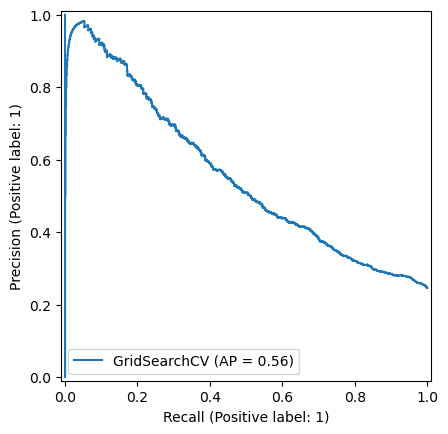

In [117]:
# Precision-recall curve
PrecisionRecallDisplay.from_estimator(estimator=grid_search, X= X_test_scaled, y=y_test_outliers)
plt.show()

+ From the PR curve, it's easily noticed that the high recall rate comes with a low precision rate. If focusing on maximizing recall, the model will catch all the true positives but also more false positives. Conversely, if focusing on precision, the model might miss true positives, leading a low recall.

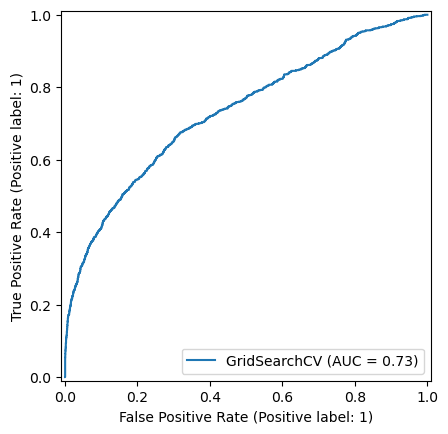

In [120]:
# ROC Curve
RocCurveDisplay.from_estimator(estimator=grid_search, X=X_test_scaled, y=y_test_outliers)
plt.show()

+ The model is more likely to predict positive, which naturally increases the FP rate as well, more negative instances get wrongly classified as postive. With AUC=0.73, it reflects that while model has a decent ability to differentiate between classes, it will still generate some false positives as it captures more ture positives.

**5.2 LogisticRegression Model (with outliers)**

In [124]:
# Set up pipeline 
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('lg', LogisticRegression())])

param_grid = {'lg__C': [0.01, 0.1, 1, 10, 100],
              'lg__solver': ['liblinear', 'lbfgs', 'saga'],
              'lg__max_iter':[500, 1000]}


# Grid Search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X_train_outliers, y_train_outliers)

y_pred_outliers = grid.predict(X_test_outliers)

print('Result with Outliers \n')
## Best Parameters 
print(f'Best Parameters: {grid_search.best_params_}')
print('\n')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_outliers, y_pred_outliers))
print('\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test_outliers, y_pred_outliers))  

Result with Outliers 

Best Parameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'saga'}


Confusion Matrix:
[[3144   62]
 [ 812  234]]


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88      3206
           1       0.79      0.22      0.35      1046

    accuracy                           0.79      4252
   macro avg       0.79      0.60      0.61      4252
weighted avg       0.79      0.79      0.75      4252



**Interpretation:**
+ False Positive (812): subscribers are incorrectly predicted as non-subscribers.
+ Class 0 (Non Subscribers):
    + Precision(0.79): out of all instances predicted as class 0, 79% are actual class 0
    + Recall(0.98): out of all actual class 0 instances, 98% were correctly predicted.
    + F1-score(0.88): The harmonic mean of precision and recall for class 0.
+ Class 1 (Subscribers):
    + Precision(0.79): out of all instances predicted as class 0, 79% are actual class 0
    + Recall(0.22):  out of all actual class 0 instances, 22% were correctly predicted.
    + F1-score(0.35):  The harmonic mean of precision and recall for class 0.
+ Overall Metrics:
    +  Accuracy(0.79):  The Model correctly classified 79% instances out of the total.

**Results of Logistic Regression model with and without outliers:**

+ The accuracy remains the same (0.79) with and without outliers, indicating that outliers do not significantly impact the overall accuracy of your model.
+ The precision and recall rate for Class 0 are very high and similar in both cases.
+ Class 1 Performance:
    + Recall: The recall for class 1 (people who will subscribe) is low in both cases but slightly higher without outliers (0.24) compared to with outliers (0.22).
    + The precision for class 1 is slightly lower without outliers (0.75) compared to with outliers (0.79).
 
Therefore, we will still continue with new dataframe has no outliers.

**5.3 Metrics results by Original imbalanced Dataframe**

In [129]:
#  Results with original dataframe (with outliers)

# Confusion Matrix:
# [[7870   82]
#  [ 902  189]]


# Classification Report:
#               precision    recall  f1-score   support

#            0       0.90      0.99      0.94      7952
#            1       0.70      0.17      0.28      1091

#     accuracy                           0.89      9043
#    macro avg       0.80      0.58      0.61      9043
# weighted avg       0.87      0.89      0.86      9043

+ The model is heavily influenced by the majority class 0, although it's leading an accuracy score 0.89, it perform poorly in identifying the minority class(class 1), with precision rate 0.70, and recall rate of 0.17.

#### 6. Second Model - SVM

In [133]:
# Imports
from sklearn.svm import SVC

In [135]:
# Instance of model
model = SVC()

# Gridsearch
param_grid = {'C':[.001, .01, .1],
              'kernel':['linear','rbf'], 
              'gamma':[1, .1, .01, .001]}

grid_svm = GridSearchCV(estimator=model, param_grid=param_grid)

# Fit model
grid_svm.fit(X_train_clean, y_train_clean)

y_pred_svm = grid_svm.predict(X_test_scaled)
 
## Best Parameters 
print(f'Best Parameters: {grid_svm.best_params_}')
print('\n')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_outliers, y_pred_svm))
print('\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test_outliers, y_pred_svm))  

Best Parameters: {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}


Confusion Matrix:
[[3166   40]
 [ 849  197]]


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      3206
           1       0.83      0.19      0.31      1046

    accuracy                           0.79      4252
   macro avg       0.81      0.59      0.59      4252
weighted avg       0.80      0.79      0.74      4252



**Interpretation:**
+ False Positive (849): subscribers are incorrectly predicted as non-subscribers.
+ Class 0 (Non Subscribers):
    + Precision(0.79): out of all instances predicted as class 0, 79% are actual class 0
    + Recall(0.99): out of all actual class 0 instances, 99% were correctly predicted.
    + F1-score(0.88): The harmonic mean of precision and recall for class 0.
+ Class 1 (Subscribers):
    + Precision(0.83): out of all instances predicted as class 0, 83% are actual class 0
    + Recall(0.19):  out of all actual class 0 instances, 19% were correctly predicted.
    + F1-score(0.31):  The harmonic mean of precision and recall for class 0.
+ Overall Metrics:
    +  Accuracy(0.79):  The Model correctly classified 79% instances out of the total.

#### 7. Third Model - Random Forest

In [139]:
# Imports 
from sklearn.ensemble import RandomForestClassifier

In [141]:
# Create instance of model with default values
rfc = RandomForestClassifier(random_state=42)

# Fit model
rfc.fit(X_train_clean, y_train_clean)

y_pred_rfc = rfc.predict(X_test_scaled)

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_outliers, y_pred_rfc))
print('\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test_outliers, y_pred_rfc)) 

Confusion Matrix:
[[2935  271]
 [ 647  399]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      3206
           1       0.60      0.38      0.47      1046

    accuracy                           0.78      4252
   macro avg       0.71      0.65      0.66      4252
weighted avg       0.76      0.78      0.77      4252



#### 7.1 Hyperparameter Tuning with GridSearchCV

In [144]:
param_grid = {
    'n_estimators': [1000, 2000],
    'max_depth': [30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 4, 7]
             }

# Initialize GridSearchCV with Random Forest
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_rfc.fit(X_train_clean, y_train_clean)

# Best Parameters 
print(f'Best Parameters: {grid_rfc.best_params_}')
print('\n')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test_outliers, y_pred_rfc))
print('\n')

# Classification report
print('Classification Report:')
print(classification_report(y_test_outliers, y_pred_rfc)) 

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 2000}


Confusion Matrix:
[[2935  271]
 [ 647  399]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      3206
           1       0.60      0.38      0.47      1046

    accuracy                           0.78      4252
   macro avg       0.71      0.65      0.66      4252
weighted avg       0.76      0.78      0.77      4252



**Interpretation:**
+ False Positive (647): subscribers are incorrectly predicted as non-subscribers.
+ Class 0 (Non Subscribers):
    + Precision(0.82): out of all instances predicted as class 0, 82% are actual class 0
    + Recall(0.92): out of all actual class 0 instances, 92% were correctly predicted.
    + F1-score(0.86): The harmonic mean of precision and recall for class 0.
+ Class 1 (Subscribers):
    + Precision(0.60): out of all instances predicted as class 0, 60% are actual class 0
    + Recall(0.38):  out of all actual class 0 instances, 38% were correctly predicted.
    + F1-score(0.47):  The harmonic mean of precision and recall for class 0.
+ Overall Metrics:
    +  Accuracy(0.78):  The Model correctly classified 78% instances out of the total.

#### 8. Model Selection 

**Logistic Regression:**
- Accuracy: 0.79
- Class 1 (Subscribers):
  - Precision: 0.75
  - Recall: 0.24

**SVM:**
- Accuracy: 0.79
- Class 1 (Subscribers):
    - Precision: 0.83
    - Recall: 0.19

**Random Forest:**
- Accuracy: 0.78
- Class 1 (Subscribers):
  - Precision: 0.60
  - Recall: 0.38

- All three models have similar accuracy, indicating that they are equally effective in terms of overall correctness. The purpose of reducing Type 1 error (False Positives) in this classification model, high precision rate for class 1 is the target. SVM model stands out with the highest precision 0.83 for class 1, meaning it has the lowest Type 1 error. The final model will be SVM.

### Final Model Fit and Prediction

#### 1. Final Model Fit 

In [ ]:
# SVM 
# Best Parameters: {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}

In [170]:
# Final Model

final_model = SVC(C=0.001, gamma=1, kernel='linear')

final_model.fit(X, y)

# Took almost 2 and half hours to get the model fit in!!!!!

SVC(C=0.001, gamma=1, kernel='linear')

#### 2. Model Deployment

In [204]:
# Imports
from joblib import dump, load
from sklearn.compose import ColumnTransformer

In [208]:
# Export model
dump(final_model, 'TermDepositmodel.joblib')

# Define columns to be scaled and encoded
cols_to_scale = ['age', 'balance', 'campaign', 'pdays', 'previous']  
cols_to_encode = ['job', 'marital', 
                  'education', 'default', 
                  'housing', 'loan', 
                  'poutcome']

# Export preprocessor
scaler = StandardScaler()
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

preprocessor =  ColumnTransformer(
                transformers=[('scale', scaler, cols_to_scale),
                              ('encode', encoder, cols_to_encode)])
dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [210]:
# load model
loaded_model = load('TermDepositmodel.joblib')

#### 3. Prediction

In [184]:
data = {'age': 28,
        'job': 'management',
        'marital': 'divorced',
        'education': 'tertiary',
        'default': 'no',
        'balance': 229,
        'housing': 'yes',
        'loan': 'no',
        'campaign': 2,
        'pdays': 315,
        'previous': 2,
        'poutcome': 'other',
        'term deposit': 1}  # Drop this col later


In [186]:
new_data = pd.DataFrame([data])

new_data = new_data.drop('term deposit', axis=1)

In [216]:
preprocessor.fit(new_data)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['age', 'balance', 'campaign', 'pdays',
                                  'previous']),
                                ('encode',
                                 OneHotEncoder(drop='if_binary',
                                               sparse_output=False),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'poutcome'])])

In [218]:
# Add any missing columns with default values (0)
expected_columns = X_train_outliers.columns

for col in expected_columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

# Reorder the columns to match the expected order
new_data_encoded = new_data_encoded[expected_columns]

In [220]:
# Make predictions 
y_predict = loaded_model.predict(new_data_encoded)

In [222]:
y_predict

array([0])

In [ ]:
# In order to get a high precision rate, the SVM model sacrifices recall rate, which might miss a lot of acutal subscirbers. 